<a href="https://colab.research.google.com/github/AlfonsoVasquezC/ComputervisionMNA/blob/main/Joel_Algoritmos_de_mejoramiento_de_im%C3%A1genes_usando_operaciones_morfol%C3%B3gicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

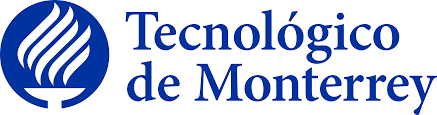

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Visión computacional para imágenes y video**
###Tecnológico de Monterrey
###Dr. Gilberto Ochoa Ruiz

## 4.2 Google Colab - Algoritmos de mejoramiento de imágenes usando operaciones morfológicas



**Por:**

* A01183284 RODRIGO RODRIGUEZ RODRIGUEZ
* A01793132 RIGOBERTO VEGA ESCUDERO
* A01016308 ALEXIS HERNANDEZ MARTINEZ
* A00820656 JUAN ALFONSO VASQUEZ CHAPOI
* A00759664 JOEL ORLANDO HERNANDEZ RAMOS

##4.2

Los ejercicios que deben agregarse a este proyecto seran las siguientes:

- Investigar una aplicación de erosión en procesamiento de imágenes e implementarlo en Colab

- Investigar una aplicación de dilatación en procesamiento de imágenes e implementarlo en Colab

- Investigar una aplicación de opening y closing e implementalo en Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
import matplotlib.image as mpig
%matplotlib inline

In [ ]:
def gethistogram(im,title):
  hist_full = cv.calcHist([im],[0],None,[256],[0,256])
  plt.plot(hist_full)
  plt.title(title)
  plt.show()

## **Introducción**

La morfología matemática es un amplio conjunto de operaciones de procesamiento de imágenes que procesan imágenes en función de las formas. Los filtros morfológicos (MF) se componen de dos operadores básicos: dilatación
y erosión, inspirado en la dilatación y erosión geométricas naturales. Los MF modifican localmente características geométricas de la señal/imagen utilizando una sonda que se asemeja a un segmento de un función/imagen que se llama elemento estructurante. Estos filtros aplican un elemento estructurante a una imagen de entrada, creando una imagen de salida del mismo tamaño. En una operación morfológica, el valor de cada píxel de la imagen de salida se basa en una comparación del píxel correspondiente de la imagen de entrada con sus vecinos.

Esta herramienta se utiliza para extraer componentes de imágenes que son útiles para la representación y descripción de la forma deu una región. Otras aplicaciones de la morfología son el engrosamiento, adelgazamiento, filtrado, esqueletización, relleno de agujeros, etc.

REFERENCIAS:


https://link.springer.com/chapter/10.1007/978-3-319-50920-4_14

https://www.mathworks.com/help/images/morphological-dilation-and-erosion.html

https://medium.com/@ami25480/morphological-image-processing-operations-dilation-erosion-opening-and-closing-with-and-without-c95475468fca

## 1. Investigar una aplicación de erosión en procesamiento de imágenes e implementarlo en Colab

>Ecuación:

A⊝B={ Z|(B ̂_z )∈A}

Los filtro mofológicos, muchas veces asumen que se trabaja con una imagen binaria donde 0 es el fondo negro y 1 es la imagen en blanco. En la erosión, el elemento estructurante viaja a través de la imagen. Donde el patrón de la imagen y todo el patrón del elemento de estructura coinciden exactamente, el píxel en el punto inicial del elemento de estructura en la imagen cambia a 1. De lo contrario cambia a 0. En otras palabras, el valor del pixel de salida de la operacion es el mínimo valor de todos los pixeles vecinos. En caso de ser una imagen binaria, un pixel se vuelve 0 si alugno de los pixeles vecinos tiene 0 como valor. 

En este sentido las carácteristicas de la erósion son:

1. La erosión elimina píxeles en los límites del objeto. En otras palabras, reduce los objetos de primer plano.
2. Agrandar agujeros en primer plano.
3. Al igual que en los Núcleos de Procesamiento de Imágenes, a mayor tamaño del Elemento de Estructura, aumenta el efecto de la Erosión.
4. Un elemento de estructura diferente da diferentes salidas en la misma imagen de entrada.

https://towardsdatascience.com/image-processing-part-3-dbf103622909

https://www.mathworks.com/help/images/morphological-dilation-and-erosion.html

Orginal 



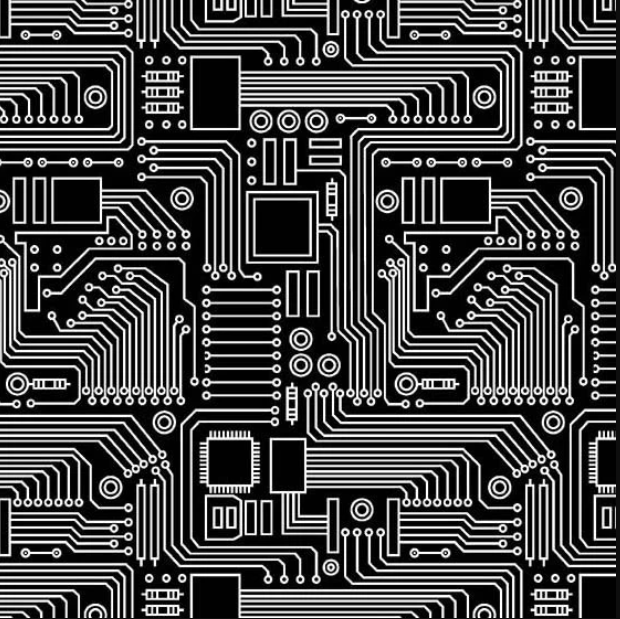

Erosionada 



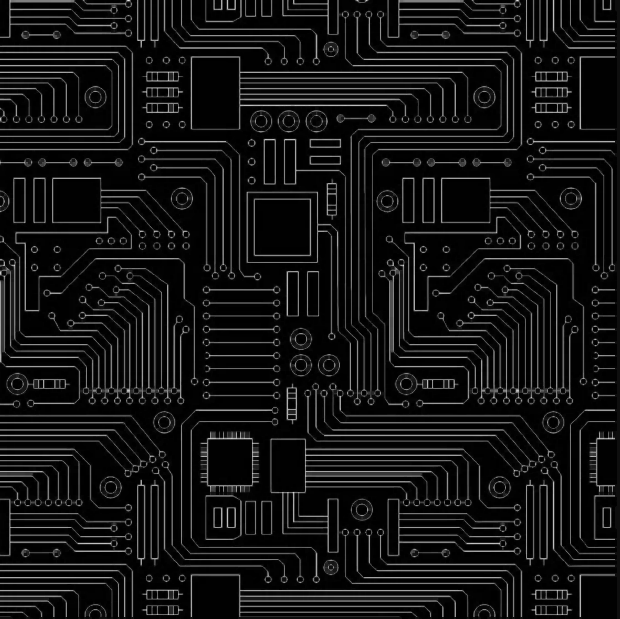

In [ ]:
#Read the image for erosion
img1= cv.imread("/content/boardcircuit.png",0)

print("Orginal \n")
cv2_imshow(img1)


# Define the structuring element
# k= 11,15,45 -Different sizes of the structuring element
k=3
SE= np.ones((k,k), dtype=np.uint8)

erosion = cv.erode(img1,SE,iterations = 1)

print("Erosionada \n")
cv2_imshow(erosion)


>Aplicación

Las huellas dactilares siempre se han empleado como pruebas de
delincuencia desde el siglo XIX; esto demuestra ser uno de las más
herramientas importantes empleadas en la ciencia forense. En los casos en que el
no se puede determinar a los delincuentes o cuando no hubo testigos
encontrados, se busca obtener huellas dactilares latentes de la escena del crimen. Estás no son más que impresiones que quedan en la superficie y causadas por la crestas en la piel. Desafortunadamente, la mayoría de los casos están degradadas o incompletas. En este caso, los operadores morfologicos pueden ser utilizados para mejorar la calidad de las huellas. 

A continuacion se muestra un caso donde se utiliza la erosión para la reducción de ruido en la muestra biométrica.

Orginal 



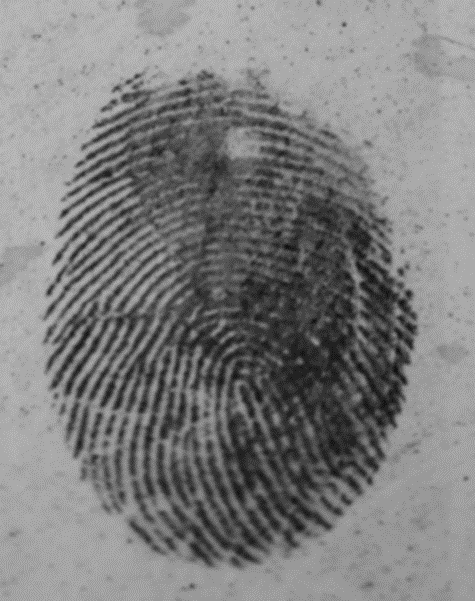

Binary Image


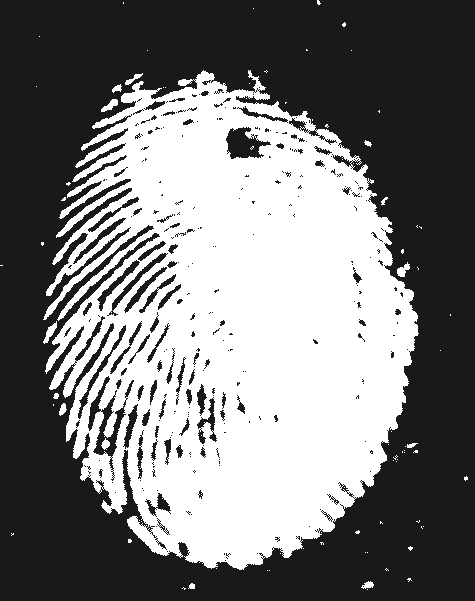

Erosionada 



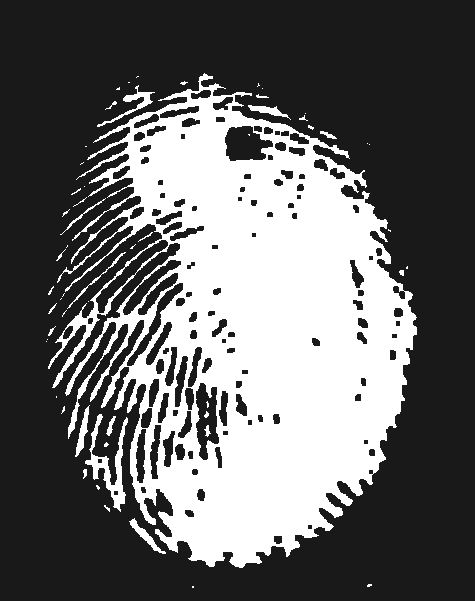

In [ ]:
#Read the image for erosion
img= cv.imread("/content/Fingerprint.png",0)

print("Orginal \n")
cv2_imshow(img)

img1= cv.imread("/content/Fingerprint.png", cv.COLOR_BGR2GRAY)


ret,img1 = cv.threshold(img1,130,230,0)

img1negative= abs(255-img1)
print("Binary Image")
cv2_imshow(img1negative)

k=4
SE= np.ones((k,k), dtype=np.uint8)

erosion = cv.erode(img1negative,SE,iterations = 1)

print("Erosionada \n")
cv2_imshow(erosion)


Como se puede ver en la imagen erosionada, el ruido de la tinta fue practicamente removido en su totalidad. Es claro que otras tácnicas de análisis de imagen tienen que ser aplicadas adiconalmente para completar la huella. 

REFERENCIAS:
https://www.ijert.org/research/enhancement-of-latent-fingerprints-using-morphological-filters-IJERTV3IS21351.pdf

##2. Investigar una aplicación de dilatación en procesamiento de imágenes e implementarlo en Colab

>Ecuación

A⊕B={ Z|[(B ̂_z )∩A]∈A}

Por el contrario, en la dilatación, el elemento estructurante viaja a través de la imagen. En este caso no es necesario que el patrón sea todo exactamente igual, donde el patrón de imagen y el patrón del elemento de estructura tienen al menos 1 píxel coincidente, el valor del píxel de salida se vuelve 1. De no coincidir en lo absoluto, el pixel de salida se convierte en 0. En otras palabras, el valor del píxel de salida es el valor máximo de todos los píxeles vecinos. En una imagen binaria, un píxel se establece en 1 si alguno de los píxeles vecinos tiene el valor 1.

En este sentido las carácteristicas de la dilatación son:

1. La dilatación agrega píxeles en los límites del objeto.
2. Rellene los agujeros en el primer plano y amplíe los objetos en primer plano.
3. Similarmente a la Erosión, un elemento estructurante más grande da un efecto de dilatación mayor y el resultado depende del elemento estructurante.

In [ ]:
#Read the image for erosion
img1= cv.imread("/content/letters.jpg",0)


print("Orginal \n")
cv2_imshow(img1)


# Define the structuring element
# k= 11,15,45 -Different sizes of the structuring element
k=10
SE= np.ones((k,k), dtype=np.uint8)

dilated = cv.dilate(img1,SE,iterations = 1)

print("Dilatada \n")
cv2_imshow(dilated)

>Aplicación



Los bordes en una imagen son la característica más básica y, por ende, son causa de mucha investigación. La detección de bordes es una técnica de bajo nivel que se utiliza para el objetivo de detección de límites de objetos. Esta es una herramienta fundamental en el procesamiento de imágenes, análisis de imágenes, visión artificial y  computacional, particularmente en las áreas de detección y extracción de características. 
Algunos estudios han demostrado que dilatar produce mejores resultados a la hora de obtener los bordes de una imagen, en comparacion con técnicas como la expansión. 

A continacuón se muestra un ejemplo.

REFERENCIAS:

https://arxiv.org/pdf/2106.07395.pdf

https://www.mdpi.com/2076-3417/11/22/10716/pdf?version=1637042380


In [ ]:
# with image X and filter F
def convolve(X, F):
    # height and width of the image
    X_height = X.shape[0]
    X_width = X.shape[1]
    
    # height and width of the filter
    F_height = F.shape[0]
    F_width = F.shape[1]
    
    H = (F_height - 1) // 2
    W = (F_width - 1) // 2
    
    #output numpy matrix with height and width
    out = np.zeros((X_height, X_width))
    #iterate over all the pixel of image X
    for i in np.arange(H, X_height-H):
        for j in np.arange(W, X_width-W):
            sum = 0
            #iterate over the filter
            for k in np.arange(-H, H+1):
                for l in np.arange(-W, W+1):
                    #get the corresponding value from image and filter
                    a = X[i+k, j+l]
                    w = F[H+k, W+l]
                    sum += (w * a)
            out[i,j] = sum
    #return convolution  
    return out

In [ ]:
def sobel(imagen):
  Gx = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
  Gy = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])
  sob_x = convolve(imagen, Gx) 
  sob_y = convolve(imagen, Gy) 
  #calculate the gradient magnitude of vectors
  sob_out = np.sqrt(np.power(sob_x, 2) + np.power(sob_y, 2))
  # mapping values from 0 to 255
  sob_out = (sob_out / np.max(sob_out)) * 255

  return sob_out

Orginal 



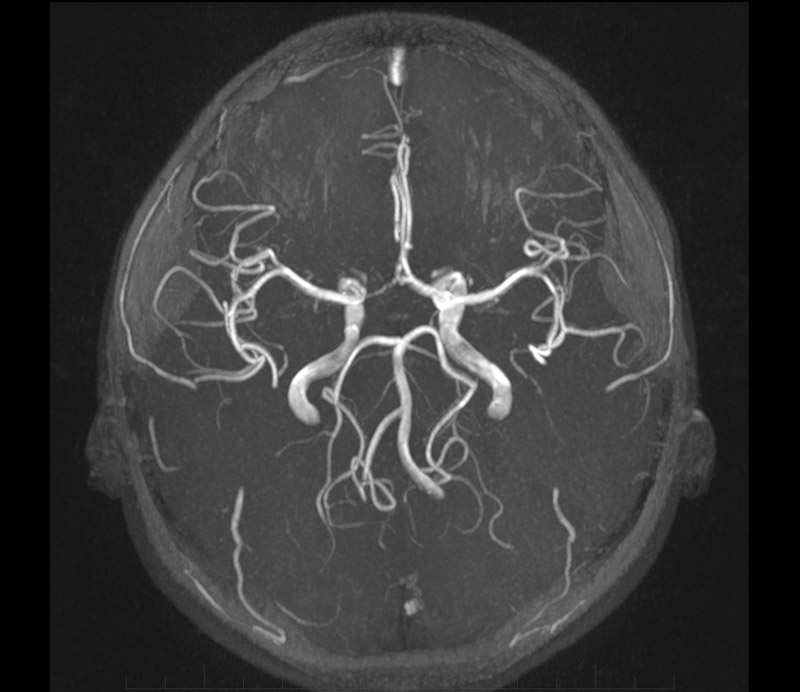

In [ ]:
img1= cv.imread("/content/head_MRI.jpg",0)

print("Orginal \n")
cv2_imshow(img1)

Sobel Image 



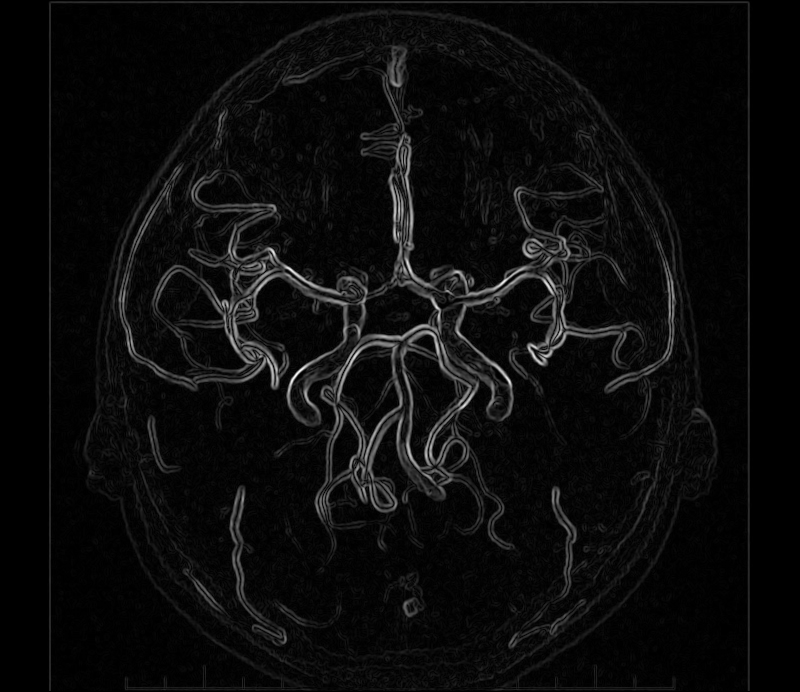

In [ ]:

print("Sobel Image \n")
sob_out = sobel(img1) 
cv2_imshow(sob_out)


Dilatada 



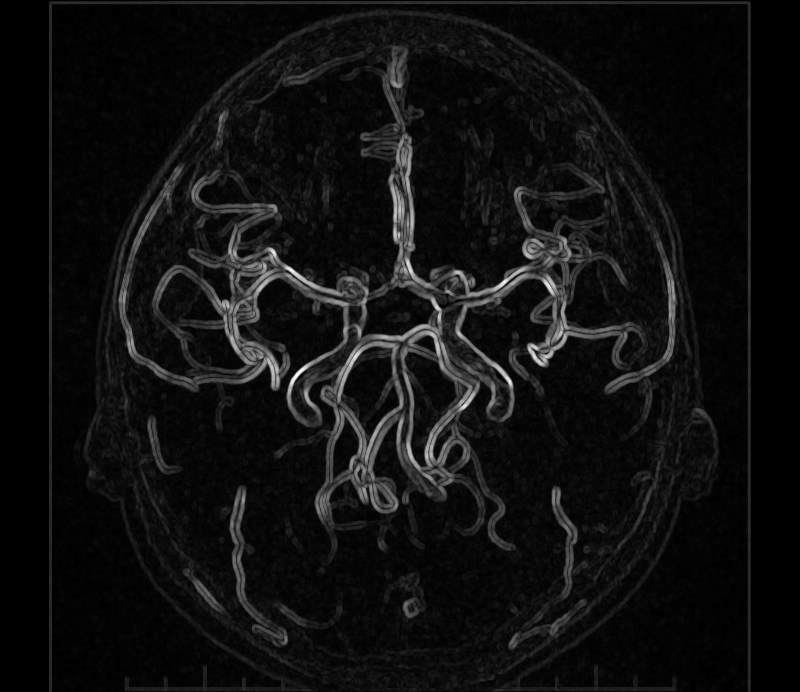

In [ ]:
k=2
SE= np.ones((k,k), dtype=np.uint8)

dilated = cv.dilate(sob_out,SE,iterations = 1)

print("Dilatada \n")
cv2_imshow(dilated)